# OLAP Analysis: Understanding Customer Purchases

Author: Alissa Beaderstadt

Purpose: In this analysis, we aim to understand how much each customer spends on individual products. This will help identify customer preferences, product performance, and opportunities for tailored marketing or promotions. 

Date: 04-17-2025

# Introduction

Objective: Analyze customer spending behavior across different products to identify purchasing patterns and inform marketing strategies.


# Imports
   Below are the necessary imports for this notebook.

In [85]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Connect to the database

In [86]:
# Connect to the smart_sales database
conn = sqlite3.connect(r"C:\Projects\smart-store-beaderstadt\data\dw\smart_sales.db")


cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in smart_sales.db:", tables)


Tables in smart_sales.db: [('customers',), ('products',), ('sales',)]


# Load Data

### Load and Inspect Customers Data

In [87]:
# Load Customers Data
customers_df = pd.read_sql_query("SELECT * FROM customers", conn)
print("Customers Data (First 5 Rows):")
print(customers_df.head())
print("\nCustomers Data Summary Statistics:")
print(customers_df.describe())

Customers Data (First 5 Rows):
   customer_id           name region   join_date  loyalty_points  \
0         1001  William White   East  11/11/2021            1256   
1         1002   Wylie Coyote   East   2/14/2023             105   
2         1003      Dan Brown   West  10/19/2023             876   
3         1004      Chewbacca   West   11/9/2022              95   
4         1005         Dr Who  North   8/18/2023             333   

  preferred_contact_method standard_date_time  
0                     Text         2021-11-11  
1                     Call         2023-02-14  
2                    Email         2023-10-19  
3                     Text         2022-11-09  
4                     None         2023-08-18  

Customers Data Summary Statistics:
       customer_id  loyalty_points
count    11.000000       11.000000
mean   1006.000000     1036.000000
std       3.316625     1170.179046
min    1001.000000       95.000000
25%    1003.500000      241.500000
50%    1006.000000      79

### Load and Inspect Products Data

In [88]:
# Load Products Data
products_df = pd.read_sql_query("SELECT * FROM products", conn)
print("\nProducts Data (First 5 Rows):")
print(products_df.head())
print("\nProducts Data Summary Statistics:")
print(products_df.describe())


Products Data (First 5 Rows):
   product_id product_name     category  unit_price  year_added supplier
0         101       laptop  Electronics      793.12        2012    Apple
1         102       hoodie     Clothing       39.10        2018     Nike
2         103        cable  Electronics       22.76        2023     Dell
3         104          hat     Clothing       43.10        2000   Adidas
4         105     football       Sports       19.78        2010   Wilson

Products Data Summary Statistics:
       product_id  unit_price   year_added
count     8.00000    8.000000     8.000000
mean    104.50000  135.802500  2013.625000
std       2.44949  266.823468     7.998884
min     101.00000   12.560000  2000.000000
25%     102.75000   22.015000  2009.500000
50%     104.50000   41.100000  2013.000000
75%     106.25000   72.510000  2019.250000
max     108.00000  793.120000  2024.000000


### Load and Inspect Sales Data

In [89]:
# Load Sales Data
sales_df = pd.read_sql_query("SELECT * FROM sales", conn)
print("\nSales Data (First 5 Rows):")
print(sales_df.head())
print("\nSales Data Summary Statistics:")
print(sales_df.describe())

# Close the connection
conn.close()


Sales Data (First 5 Rows):
   sale_id  customer_id  product_id  store_id  campaign_id  sale_amount  \
0      550         1008         102       404            0        39.10   
1      551         1009         105       403            0        19.78   
2      552         1004         107       404            0       335.10   
3      553         1006         102       406            0       195.50   
4      554         1005         102       405            0       117.30   

    sale_date  discount_percent     state  
0  2024-01-06              0.25    Kansas  
1  2024-01-06              0.15  Missouri  
2  2024-01-16              0.50      Iowa  
3  2024-01-16              0.09  Nebraska  
4  2024-01-25              0.20      Ohio  

Sales Data Summary Statistics:
          sale_id  customer_id  product_id    store_id  campaign_id  \
count   94.000000    94.000000   94.000000   94.000000    94.000000   
mean   596.500000  1005.723404  104.393617  403.319149     0.425532   
std     27.2

# Merge Dataframes

In [90]:

# Merge the sales and customers DataFrame on 'customer_id'
sales_customers_df = pd.merge(sales_df, customers_df, on='customer_id', how='inner')

# Merge the above result with products data on 'product_id'
final_df = pd.merge(sales_customers_df, products_df, on='product_id', how='inner')

# Display the first few rows of the merged DataFrame
print("Merged DataFrame (First 5 Rows):")
print(final_df.head())

# Get a summary of the merged data
print("\nMerged DataFrame Summary Statistics:")
print(final_df.describe())

Merged DataFrame (First 5 Rows):
   sale_id  customer_id  product_id  store_id  campaign_id  sale_amount  \
0      550         1008         102       404            0        39.10   
1      551         1009         105       403            0        19.78   
2      552         1004         107       404            0       335.10   
3      553         1006         102       406            0       195.50   
4      554         1005         102       405            0       117.30   

    sale_date  discount_percent     state           name region  join_date  \
0  2024-01-06              0.25    Kansas     Tony Stark  North   5/1/2020   
1  2024-01-06              0.15  Missouri   Jason Bourne   West  12/1/2020   
2  2024-01-16              0.50      Iowa      Chewbacca   West  11/9/2022   
3  2024-01-16              0.09  Nebraska  Tiffany James  South   6/7/2021   
4  2024-01-25              0.20      Ohio         Dr Who  North  8/18/2023   

   loyalty_points preferred_contact_method stan

# Analysis: Exploring Laptop Purchases
(Slicing) This section focuses on analyzing customer spending behavior specifically for the 'laptop' product.

In [91]:
# Slice: Look at spending on the 'laptop' product
sliced_df = final_df[final_df['product_name'] == 'laptop']

# Group to see total spend by customer on laptops
sliced_summary = sliced_df.groupby('customer_id')['sale_amount'].sum().reset_index()

# Display
print("Customer Spend on Laptops:")
print(sliced_summary)


Customer Spend on Laptops:
   customer_id  sale_amount
0         1001     22207.36
1         1002      5551.84
2         1003      1586.24
3         1004     11103.68
4         1006      9517.44
5         1007      9517.44
6         1009       793.12
7         1010     21414.24
8         1011      7138.08


# Visualization: Total Spending by Customer on Laptops

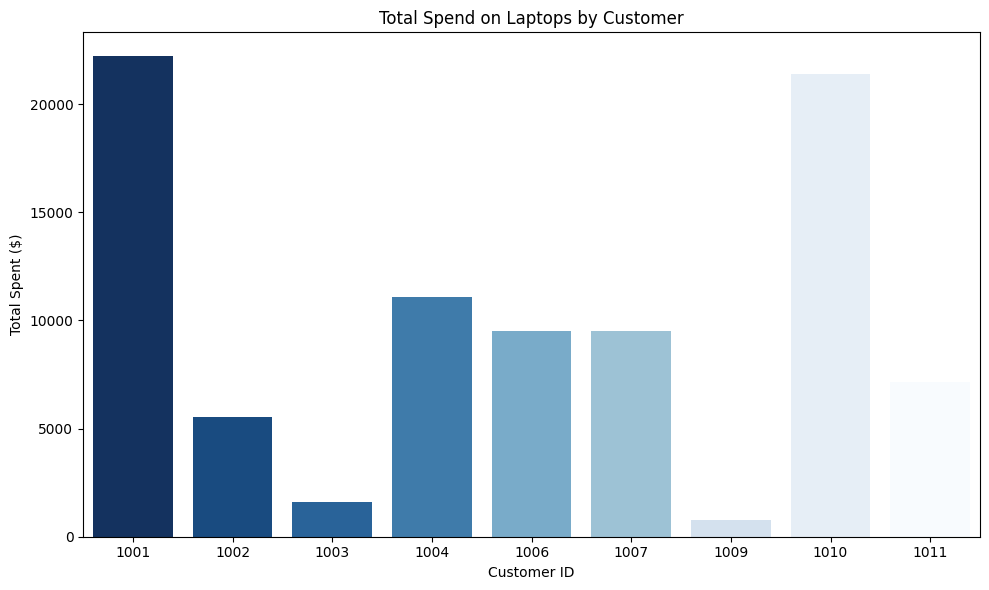

In [92]:
# Filter for laptops only
sliced_df = final_df[final_df['product_name'] == 'laptop']

# Group to get total spend per customer on laptops
sliced_summary = sliced_df.groupby('customer_id')['sale_amount'].sum().reset_index()

# Visualization: Total spend on laptops by customer
plt.figure(figsize=(10, 6))
sns.barplot(data=sliced_summary, x='customer_id', y='sale_amount', hue='customer_id', palette='Blues_r', legend=False)
plt.title("Total Spend on Laptops by Customer")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()

## Observation: 
Spending on laptops varies significantly across customers, with a few individuals making notably high purchases. This suggests that while laptops are a high ticket item, demand is concentrated among a smaller segment of customers.

# Analysis: Total Spend per Customer by Product
(Dicing) This table illustrates how much each customer has spent on each product.

In [93]:
# Query to calculate total spend per customer for each product
customer_spend_df = final_df.groupby(['customer_id', 'product_id'])['sale_amount'].sum().reset_index()

# Display the results
print("Total Spend by Customer on Each Product:")
print(customer_spend_df.head())


Total Spend by Customer on Each Product:
   customer_id  product_id  sale_amount
0         1001         101     22207.36
1         1001         104       560.30
2         1001         105        39.56
3         1001         106       622.86
4         1001         107       134.04


# Visualization: Total Spend by Customer on Each Product

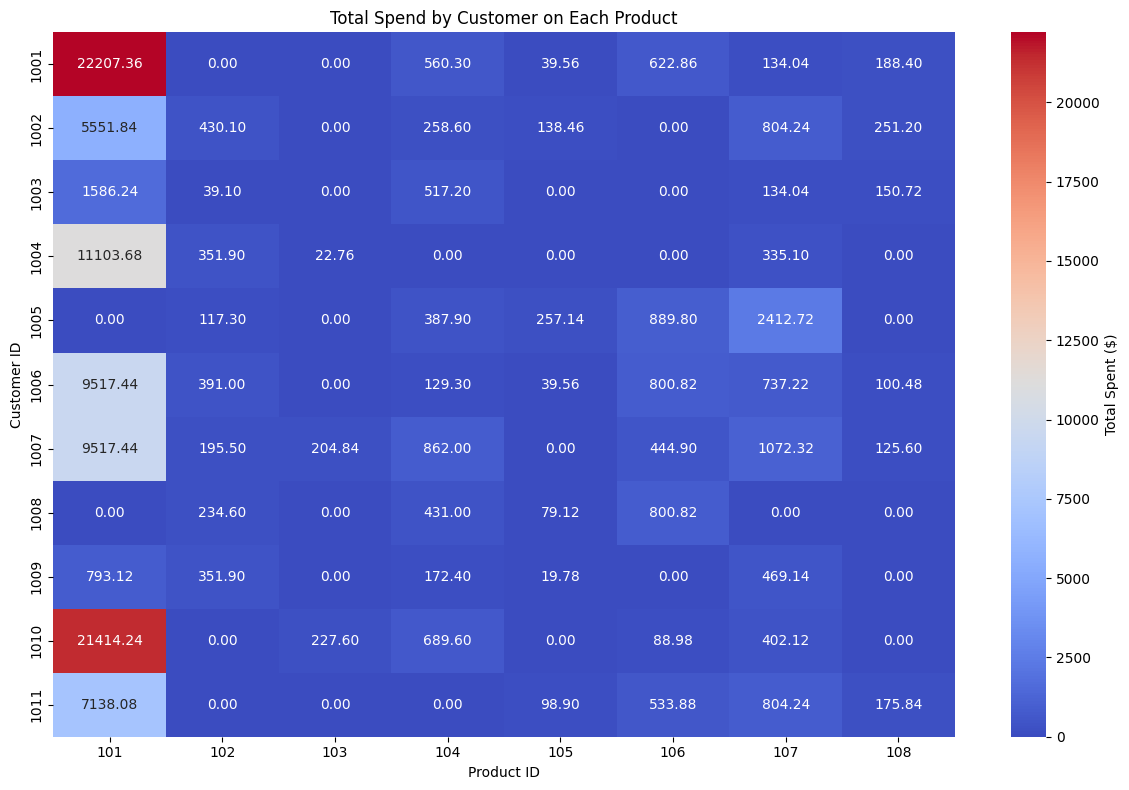

In [94]:
# Pivot the DataFrame to create a table where rows are customer_ids and columns are product_ids
# Values will be the total spent by each customer on each product
heatmap_data = customer_spend_df.pivot_table(index='customer_id', columns='product_id', values='sale_amount', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Total Spent ($)'})
plt.title("Total Spend by Customer on Each Product")
plt.xlabel("Product ID")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


## Observation:
This heatmap reveals spending patterns by individual customers across all products. Warmer colors indicate higher spending, and Product ID 101 (laptops) stands out with consistently warm boxes and two bright red cells, indicating exceptionally high spending from certain customers. This suggests laptops are a top performing product, and customers purchasing them may be prime candidates for loyalty rewards or related product recommendations.

# Analysis: Monthly to Daily Sales Breakdown
(Drill Down) This analysis breaks down total sales from a monthly overview to daily trends for each product.

Monthly Sales Rollup:
     month  sale_amount
0  2024-01      6431.02
1  2024-02     14591.46
2  2024-03     12150.18
3  2024-04     16945.10
4  2024-05     10982.82
5  2024-06      6444.10
6  2024-07     21038.12
7  2024-08      4627.20
8  2024-09      9492.80
9  2024-10      5853.54
Daily Product Sales Drilldown for 2024-08:
    day product_name  sale_amount
0     1       jacket       536.16
1     1    protector       100.48
2     2    protector       251.20
3     5          hat       129.30
4     5    protector        37.68
5    14       jacket       201.06
6    14       laptop      2379.36
7    21          hat       172.40
8    21       jacket       268.08
9    25          hat       258.60
10   25    protector        75.36
11   28   controller       177.96
12   28     football        39.56


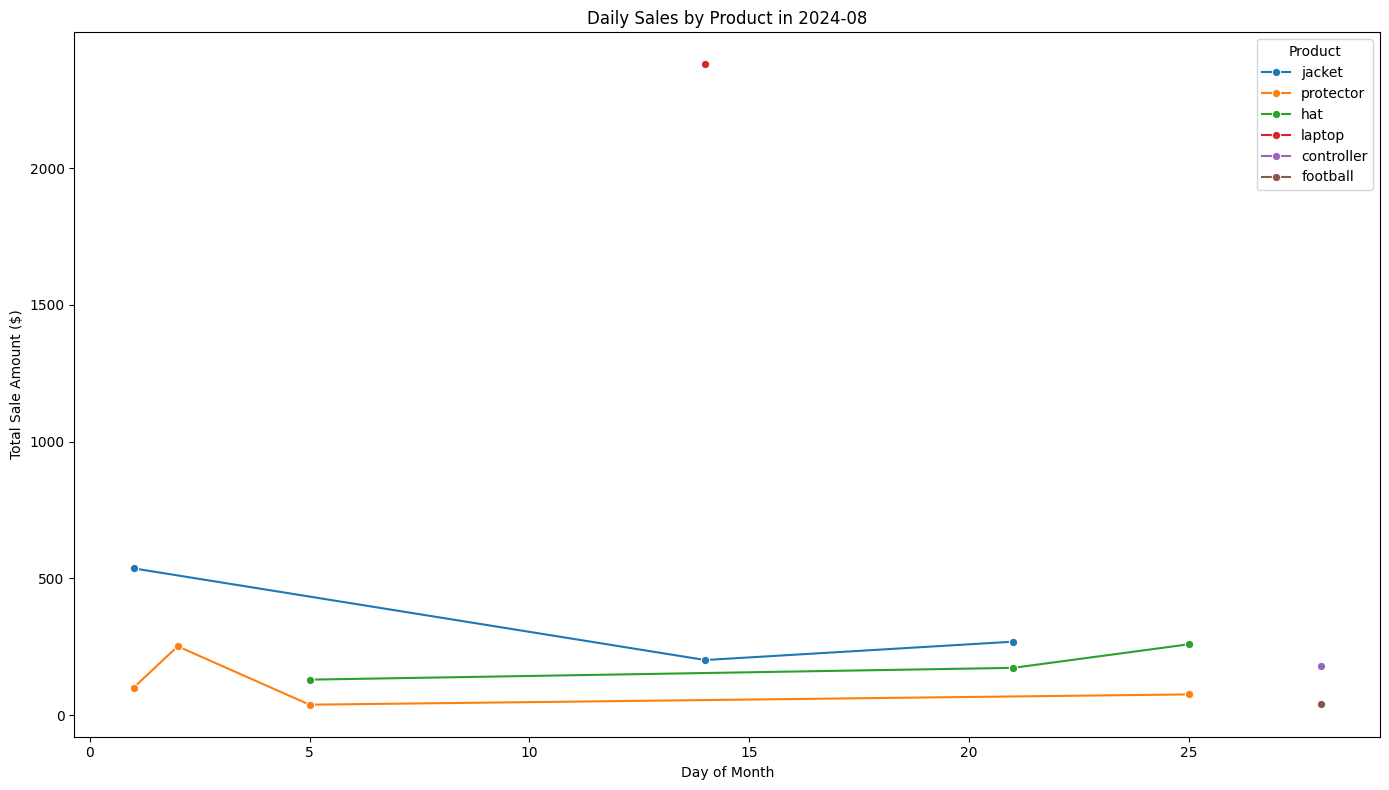

In [95]:
# ROLLUP: Total sales by month
final_df['sale_date'] = pd.to_datetime(final_df['sale_date'])
final_df['month'] = final_df['sale_date'].dt.to_period('M')

monthly_sales = final_df.groupby('month')['sale_amount'].sum().reset_index()
print("Monthly Sales Rollup:")
print(monthly_sales)

# DRILLDOWN: Pick one month and examine daily sales by product
chosen_month = '2024-08'
drill_df = final_df[final_df['month'] == chosen_month].copy()
drill_df['day'] = drill_df['sale_date'].dt.day

# Group by both day and product to see product level sales per day
daily_product_sales = drill_df.groupby(['day', 'product_name'])['sale_amount'].sum().reset_index()
print(f"Daily Product Sales Drilldown for {chosen_month}:")
print(daily_product_sales)

# Visualization: Lineplot showing daily sales trends by product
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_product_sales, x='day', y='sale_amount', hue='product_name', marker='o')
plt.title(f"Daily Sales by Product in {chosen_month}")
plt.xlabel("Day of Month")
plt.ylabel("Total Sale Amount ($)")
plt.legend(title='Product')
plt.tight_layout()
plt.show()

## Observation:
```text
While July had the highest monthly sales ($21,038.12), August saw a significant drop to $4,627.20, making it the lowest performing month. A closer look at August's daily sales reveals that August 14th had a standout spike, driven primarily by laptop sales totaling $2,379.36 over half the month's revenue. This suggests that even during slower months, high ticket items like laptops can drive significant daily performance.
```

## Summary: Which Products Drive the Most Revenue?

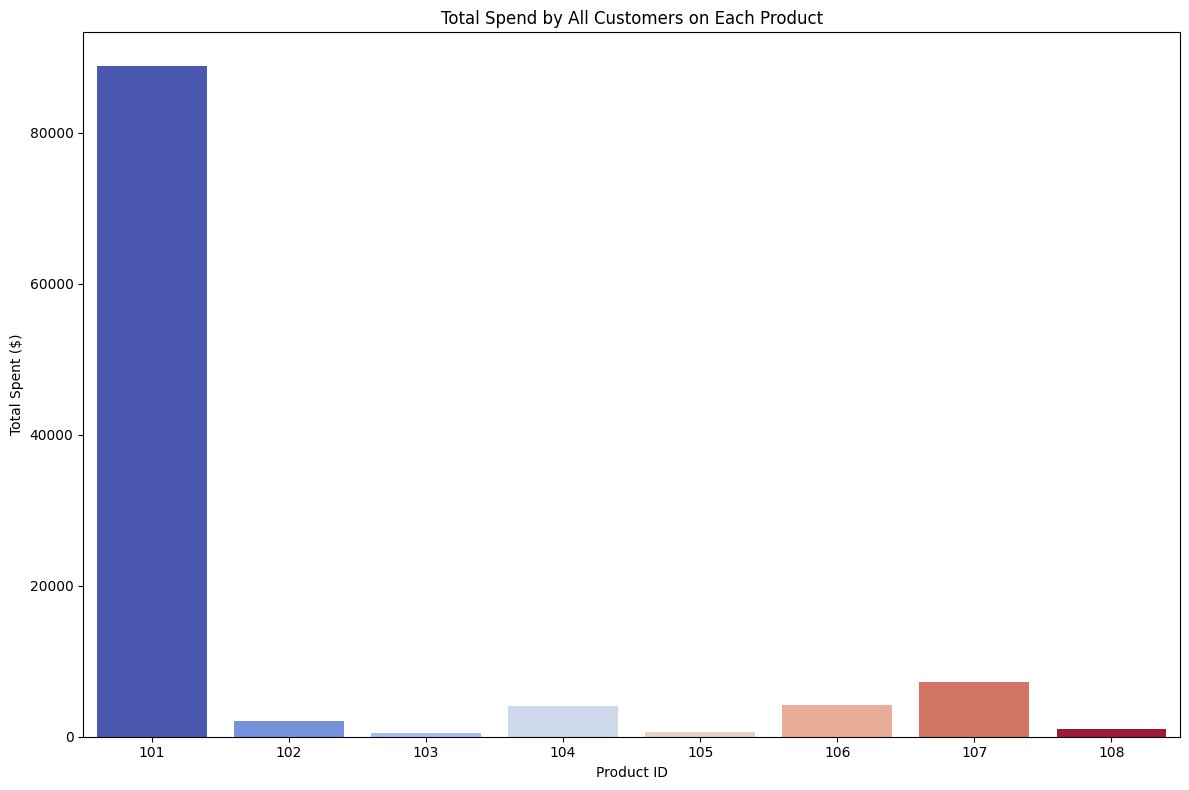

In [96]:
# Group by ProductID and sum the sale_amount to get total spend for each product across all customers
total_spent_by_product = customer_spend_df.groupby(['product_id'])['sale_amount'].sum().reset_index()

# Simple barplot to visualize total spend by all customers on each product
plt.figure(figsize=(12, 8))
sns.barplot(
    data=total_spent_by_product,
    x='product_id',
    y='sale_amount',
    hue='product_id',              # assign hue 
    palette='coolwarm',
    legend=False                  
)
plt.title("Total Spend by All Customers on Each Product")
plt.xlabel("Product ID")
plt.ylabel("Total Spent ($)")
plt.tight_layout()
plt.show()

## Observation:
Laptops (Product ID 101) clearly stand out as the top selling item across all customers, followed by jackets and hats. This confirms earlier insights from the heatmap and drilldown, reinforcing laptops as a key driver of revenue.

# Conclusion
- The 'laptop' product stands out as the highest total spend among customers, highlighting its strong demand and the importance of this product in the store's sales performance.

- Certain customers, such as Customer 1001 and 1010, spent significantly on laptops. This presents an opportunity to target these high spending customers with personalized promotions or special offers.

- Understanding these spending behaviors provides valuable information for inventory management, product promotions, and customer engagement strategies to drive sales growth and customer satisfaction.

# Insights and Recommendations

- Top Products: Customers spend the most on laptops, as seen from the heatmap where the red cells indicate higher spending.

- Marketing Opportunity: Personalized promotions can be created for highspending customers like Customer 1001 and 1010, as identified in the heatmap with red cells. These promotions could target their preferences to increase sales further.

- Inventory Planning: Products with high customer spend, such as laptops, should be prioritized for restocking or bundling with complementary products to maximize revenue.

- Actionable Next Steps:

  - Target high spending customers with personalized promotions based on their spending behavior.

  - Focus marketing efforts on top selling products to ensure stock is readily available for popular items.

  - Track seasonal trends, run customer segmentation analysis, and consider predictive models to forecast future purchases and enhance customer targeting.
